<a href="https://colab.research.google.com/github/longhowlam/python_hobby_stuff/blob/master/german_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/longhowlam/python_hobby_stuff/blob/master/german_credit.ipynb)

# Introduction

This notebook shows the analysis results of the German credit data set, as part of the assessment for EE The data set I used in this notebook is dowloaded from Kaggle. See the data on Kaggle[ here](https://www.kaggle.com/btolar1/weka-german-credit?select=credit-g.csv). 

My first weapons of choice for structured (i.e. tabular) data like the german credit data set are **pandas**, **pandas-profiling**, **plotly-express** and **sweetviz**. The main modeling tool I am using here is **pycaret**. It is a low code tool that is essentially a wrapper around other ML tools such as  scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, etc. The uniform low code approach which will benefit readability and maintainability of ML code, while on the other hand the code does allow for enough flexbility to tweak models if needed. Moreover, it provides interactive explorative data analysis.

This notebook was created on google colab. It is a convenient analysis environment, it provides a free python run-time environment accessible from just a browser. Moreover, there are already a lot python packages installed. And as bonus, the interactive [data table viewer](https://colab.research.google.com/notebooks/data_table.ipynb) inside colab notebooks are very handy to browse and glance trough data.  





# German Credit Introduction

The german credit data set is a data set with 1000 loan applicants, each row is a loan applicant. There are twenty input variables, i.e. loan and loan-applicant characteristics and there is one binary target. The target tells us whether the loan is considerd bad or good.

# Installs and packages needed

In [ ]:
### install pycaret, shap and autoviz, other packages are already available on google colab
!pip install pycaret
!pip install shap
!pip install sweetviz

In [14]:
#### python packages needed
import pandas as pd
import numpy as np

from pycaret.classification import *

import plotly.express as px
import sweetviz as sv

# Data Import 

In [19]:
german_credit = pd.read_csv('credit-g.csv')

### Create a numerical target with 1 for good and 0 for bad, that is usefull for plotting good/bad ratios.
german_credit['num_target'] =  np.where(german_credit['class'] == 'good', 1, 0)

german_credit.shape

(1000, 22)

In [20]:
german_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [27]:
german_credit.foreign_worker.value_counts()

yes    963
no      37
Name: foreign_worker, dtype: int64

In [16]:
german_credit.head(5)

checking_status  duration  ... class num_target
0              <0         6  ...  good          1
1        0<=X<200        48  ...   bad          0
2     no checking        12  ...  good          1
3              <0        42  ...  good          1
4              <0        24  ...   bad          0

[5 rows x 22 columns]

# Data Exploration

We are going to use **pandas profiling** to glance trough visuals to get a first understanding of the data. The visuals can be displayed in the notebook, or because a lot of visuals are created, it might be more convenient to export the output to a html file from which it is easier to dive into the visuals. Either way, there is no shortcut, you should glance trough visuals.

Moreover, in real use cases, often you need to confront the business with 'strange' or counter intuitive findings. This will give you more reassurance that the data is OK or that you have tackled data issues.

## profiling report

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(german_credit, interactions=None,  title="German Credit Profiling Report")
prof.to_file(output_file='german_credit_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prof

## The target and input variables

By looking at the 'correlations' secion of the pandas-profiling output, we already got some idea what input variables correlate (strongly) with the target variable. From a first glance, we see that the input variables checking status, duration and saving status correlate with the target.


We are going to dive in a bit deeper here. We are not only interested in whether or not there is correlcation between an input variable and the target, we want to get an understanding in the relationship between an input variable and the target.


Here we make use of the numerical target (being 1 for good and 0 for bad). When using lowess smoothing (or just averages for categorical variables) we immediately get the good/bad ratio estimated for certain  values of the inputs.

In [11]:
fig1 = px.scatter(
    german_credit, 
    x = 'age',
    y = 'num_target',  
    trendline = "lowess",
    title = 'Good / Bad ratio versus age' ,
    height = 500, width = 700,
    
  )
fig1

In [12]:
fig2 = px.scatter(
    german_credit, 
    x = 'duration',
    y = 'num_target',  
    trendline = "lowess", 
    title = 'Good / Bad ratio versus duration' ,
    height = 500, width = 700,
  )
fig2

In [13]:
fig3 = px.histogram(
  german_credit, 
  x = 'checking_status',
  y = 'num_target',
  histfunc = 'avg',
  title = 'Good / Bad ratio versus checking status',
  height = 500, width = 700,
)
fig3

### Sweetviz

A nice alternative to creating **target - input variable profile plots** with plotly express as I did above is to make use of the Sweetviz package. It automatically profiles each input variable against the target.



In [ ]:
target_analysis = sv.analyze(german_credit, target_feat = 'num_target')

                                             |          | [  0%]   00:00 -> (? left)


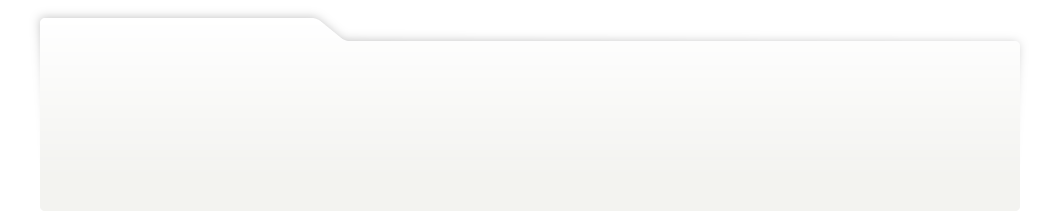
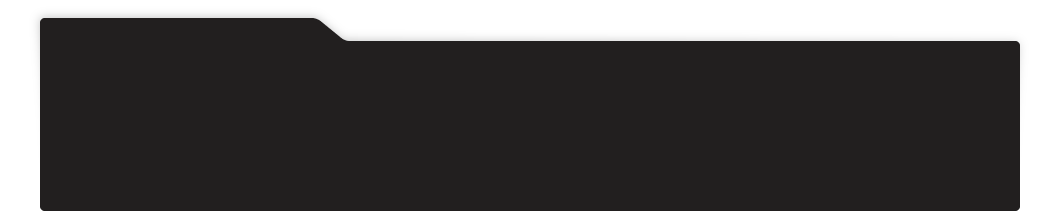
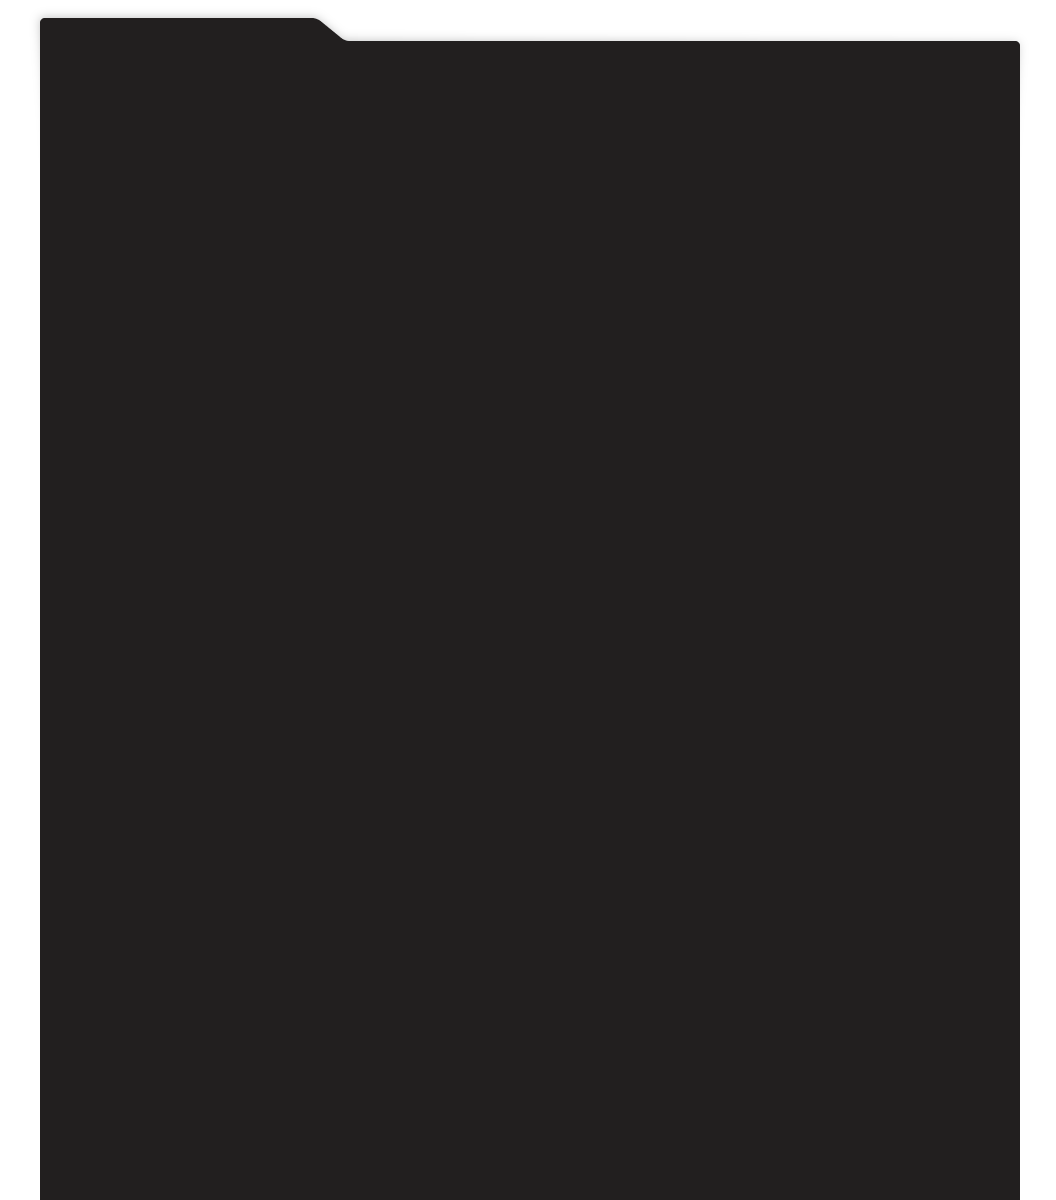
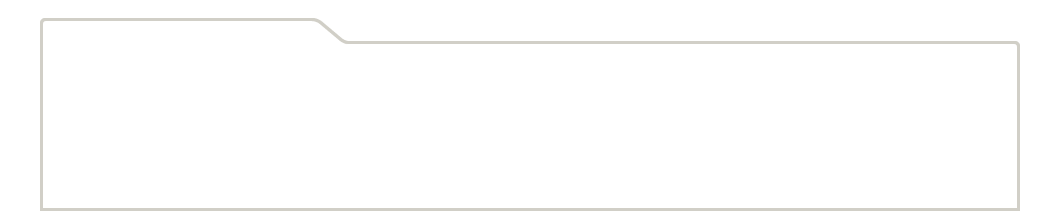
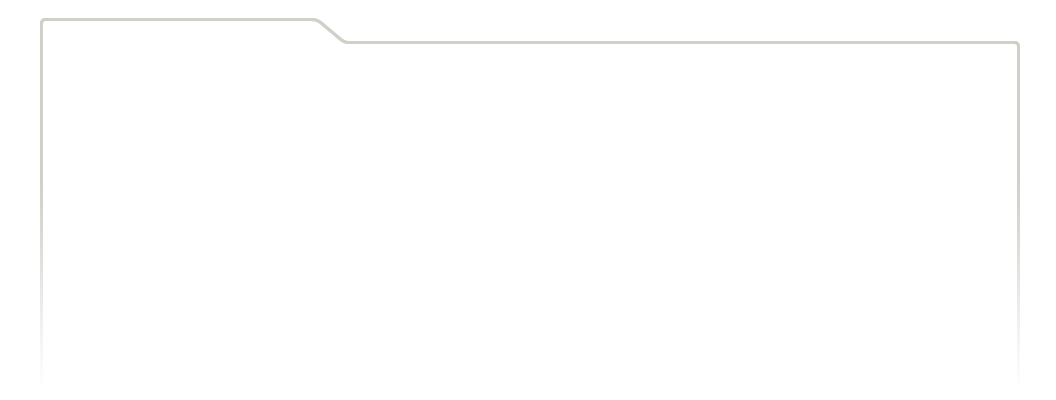
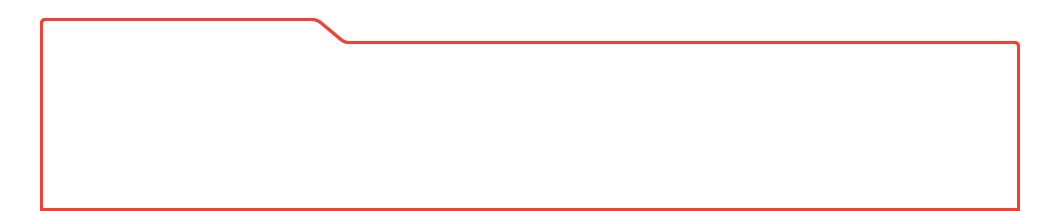
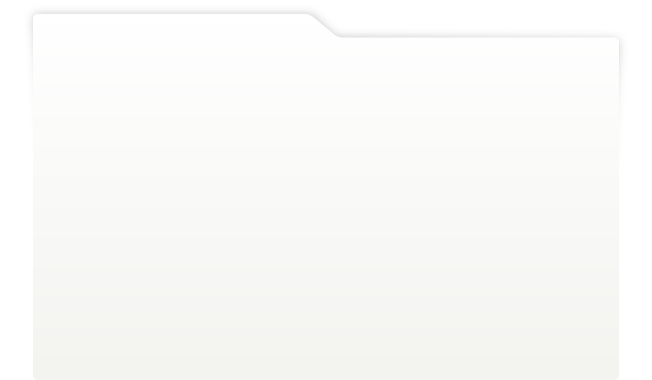
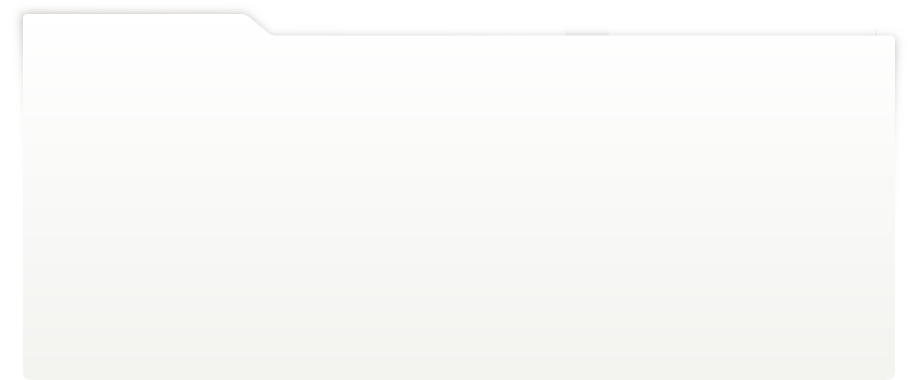
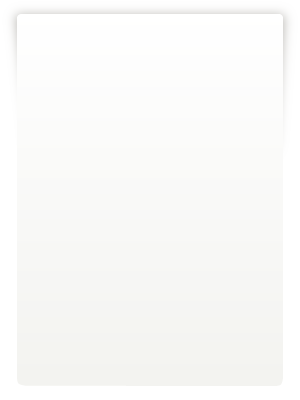
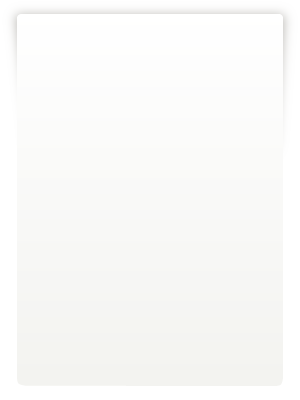
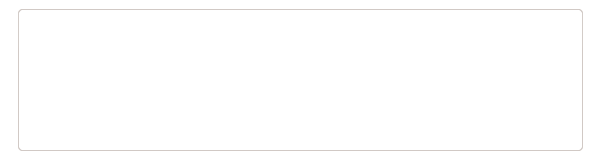
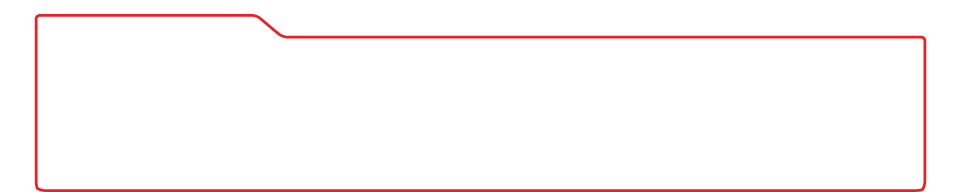
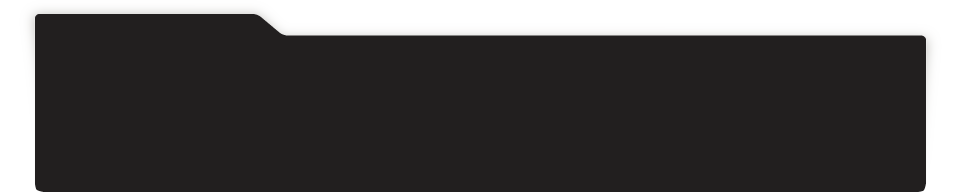
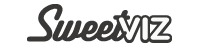
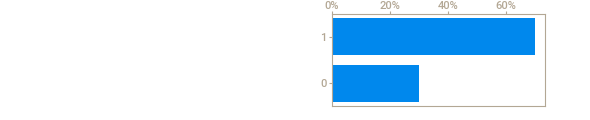
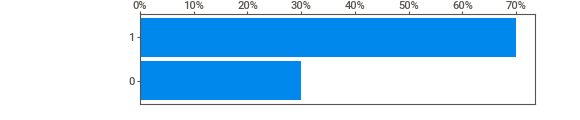
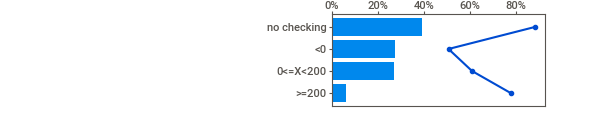
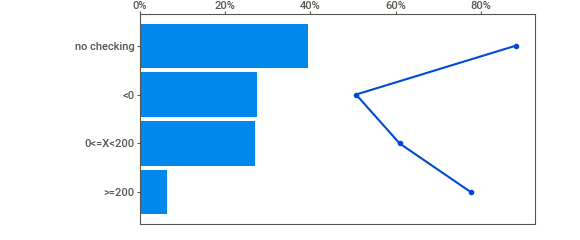
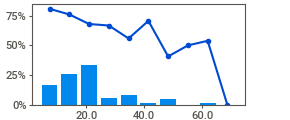
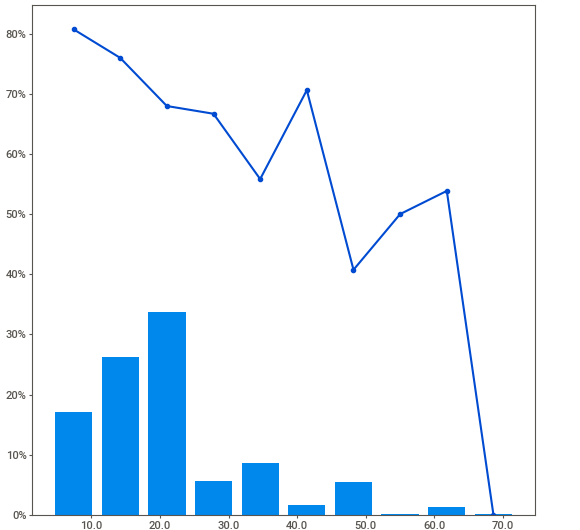
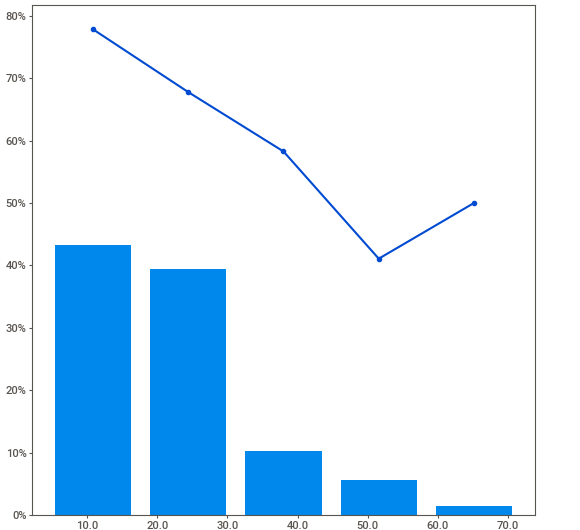
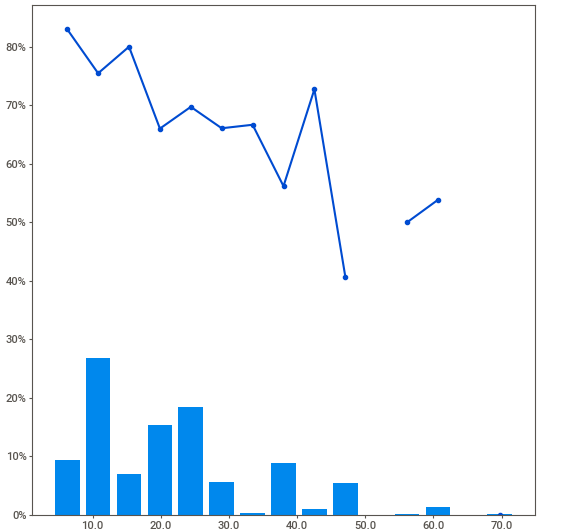
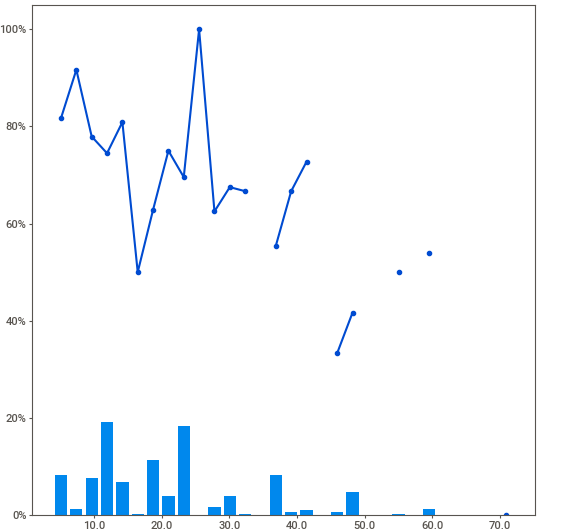
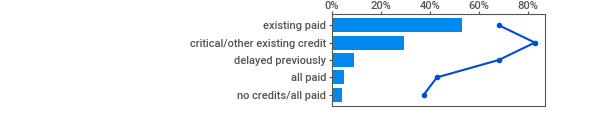
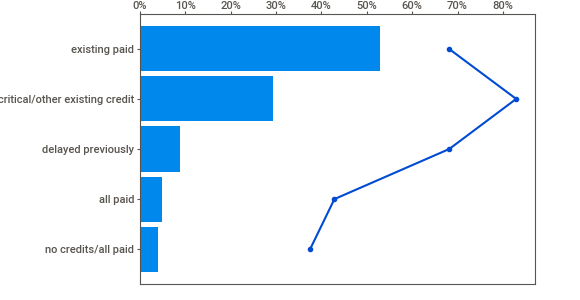
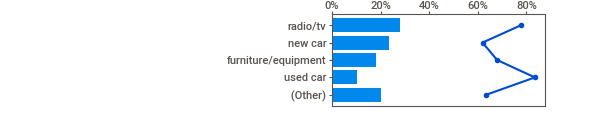
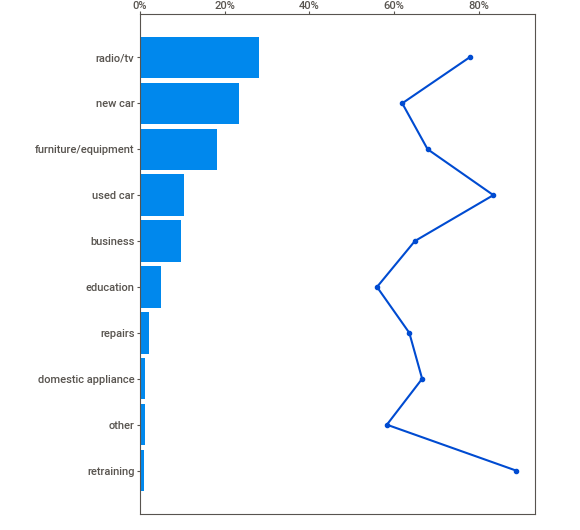
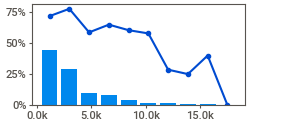
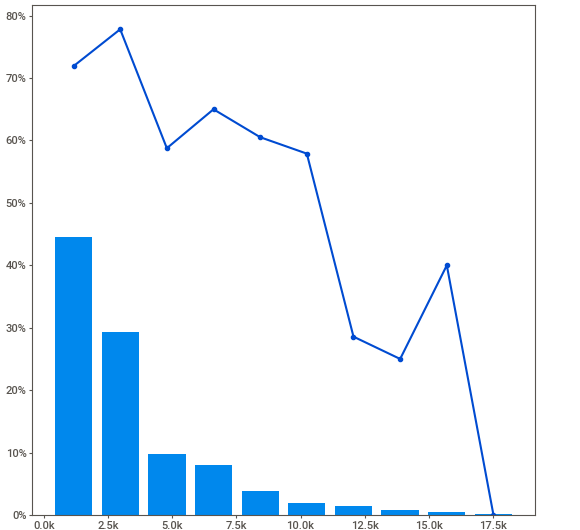
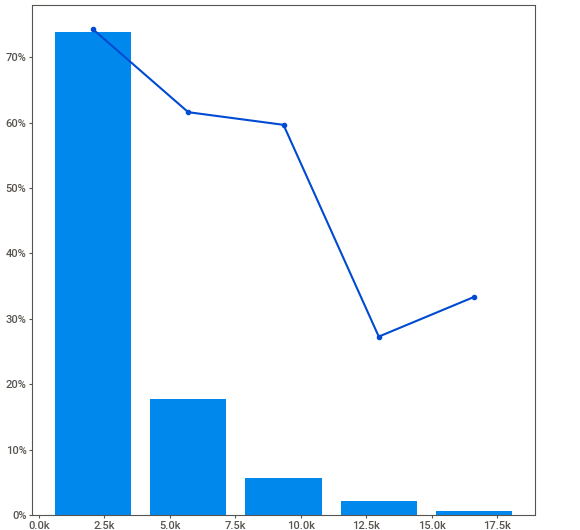
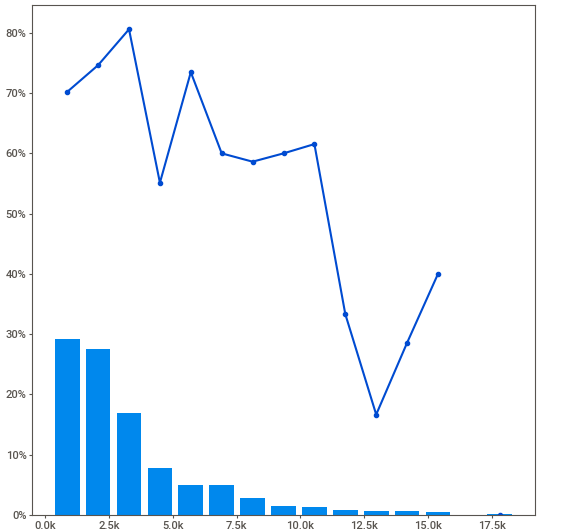
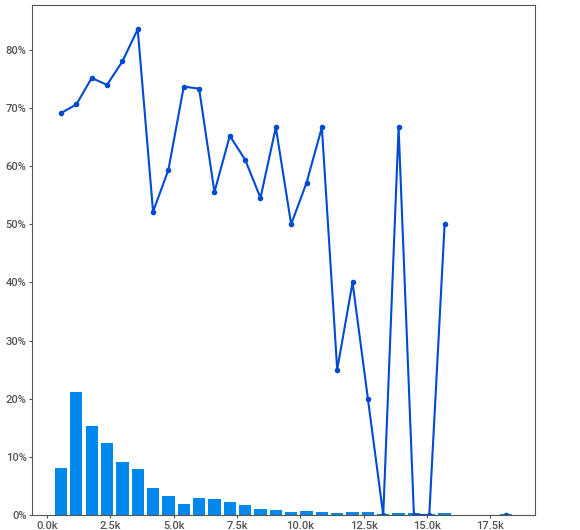
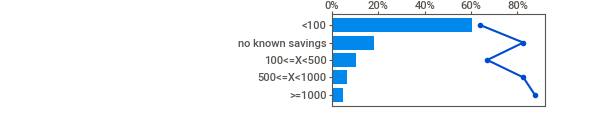
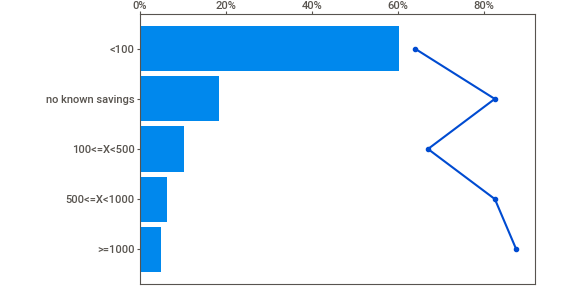
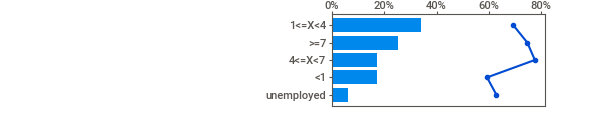
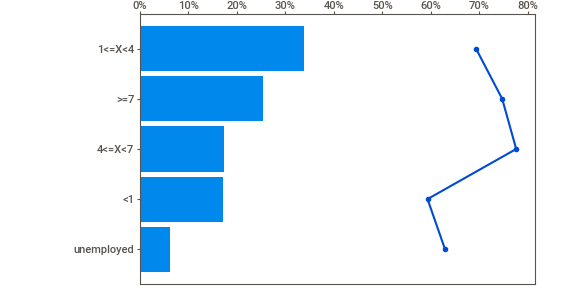
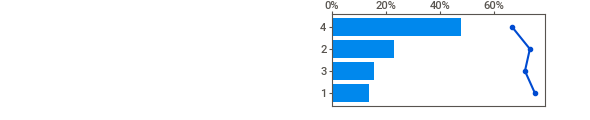
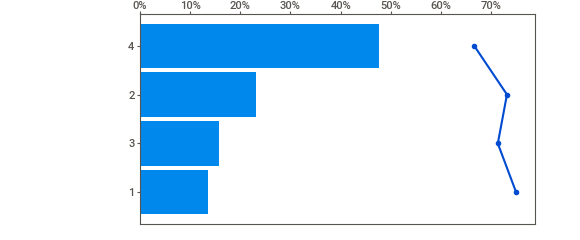
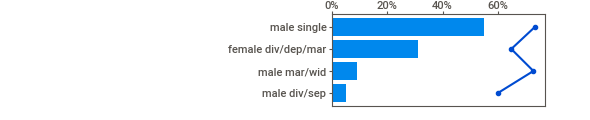
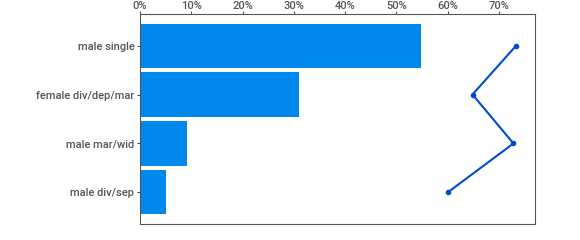
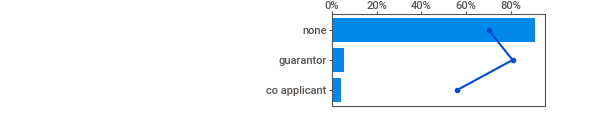
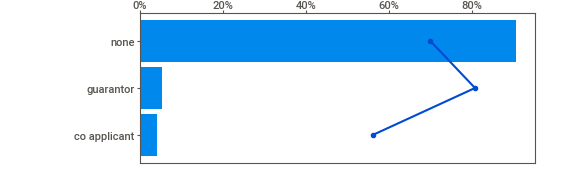
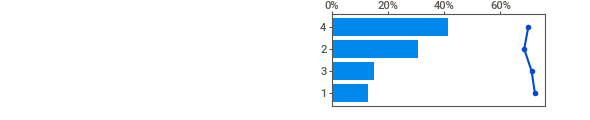
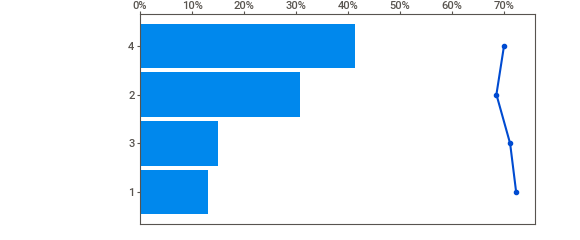
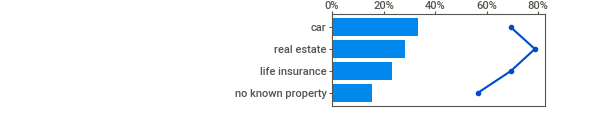
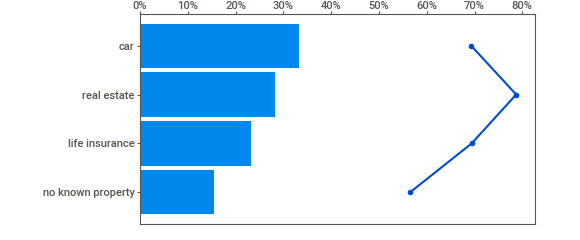
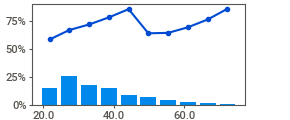
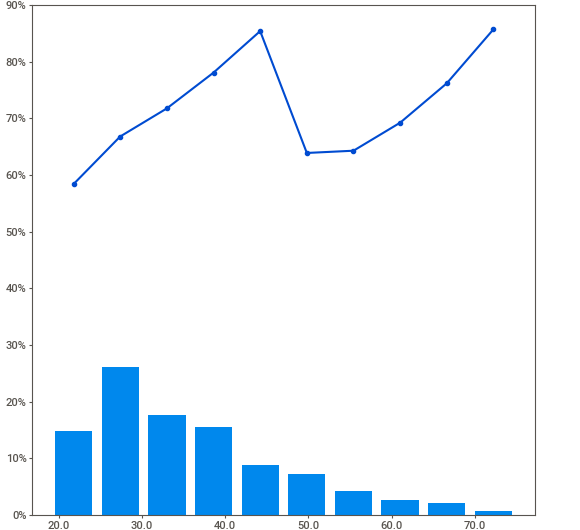
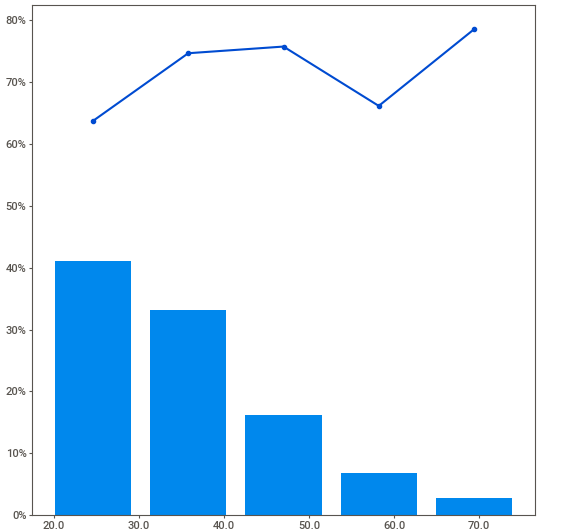
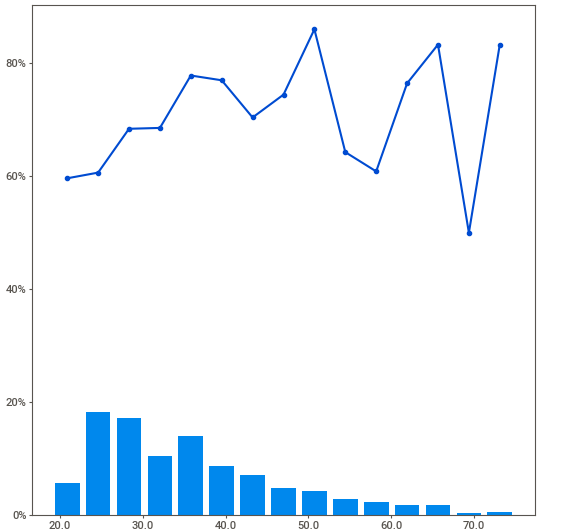
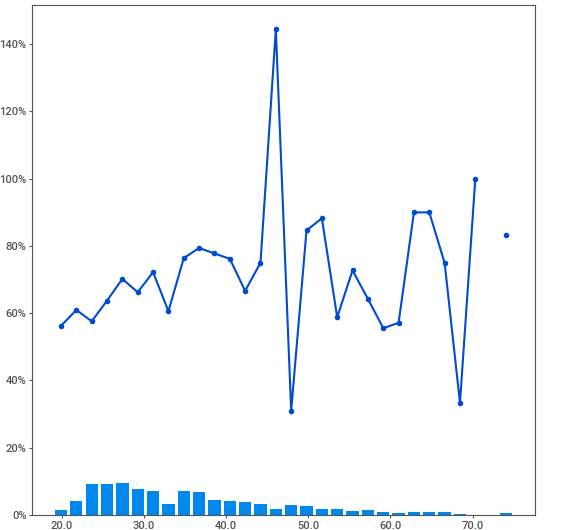
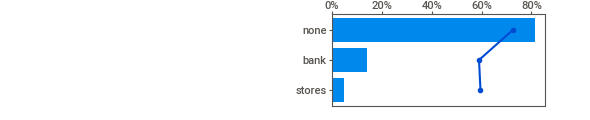
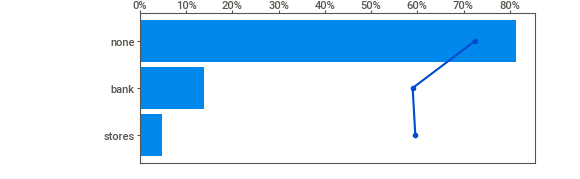
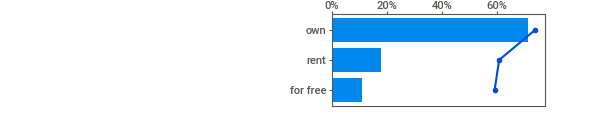
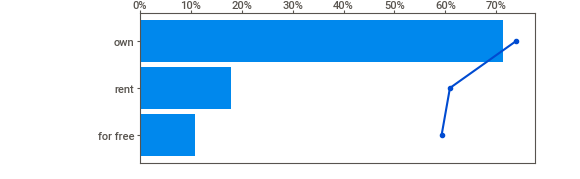
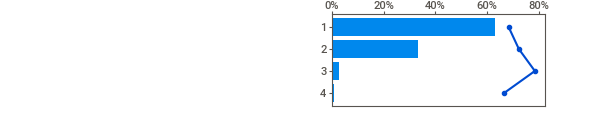
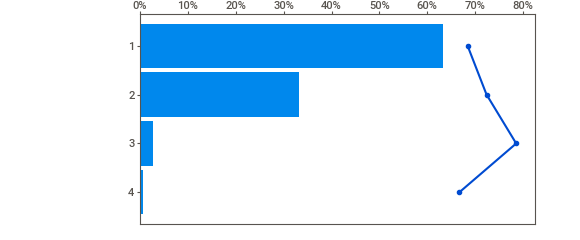
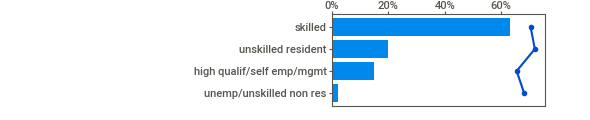
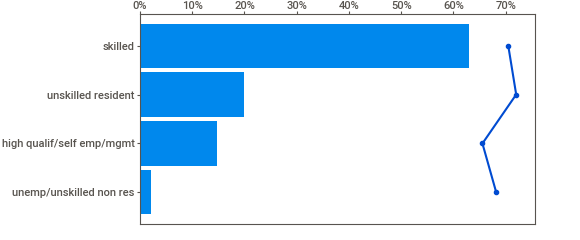
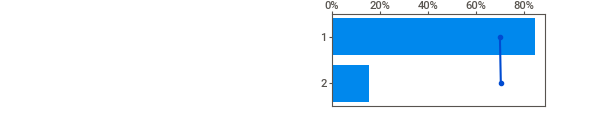
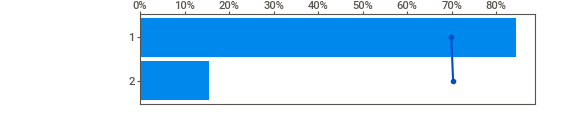
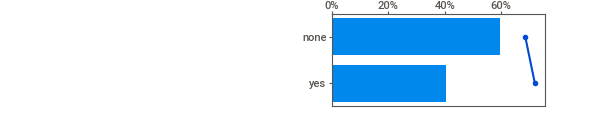
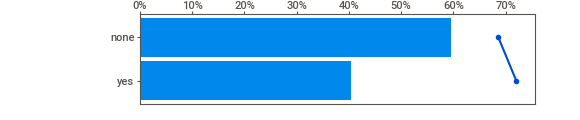
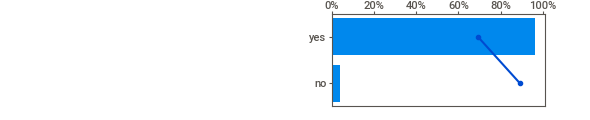
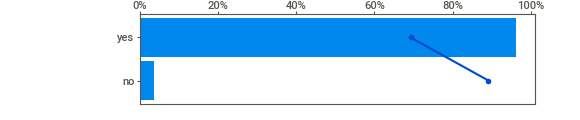
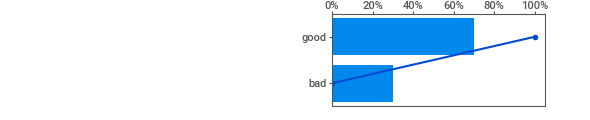
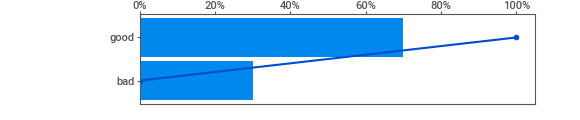
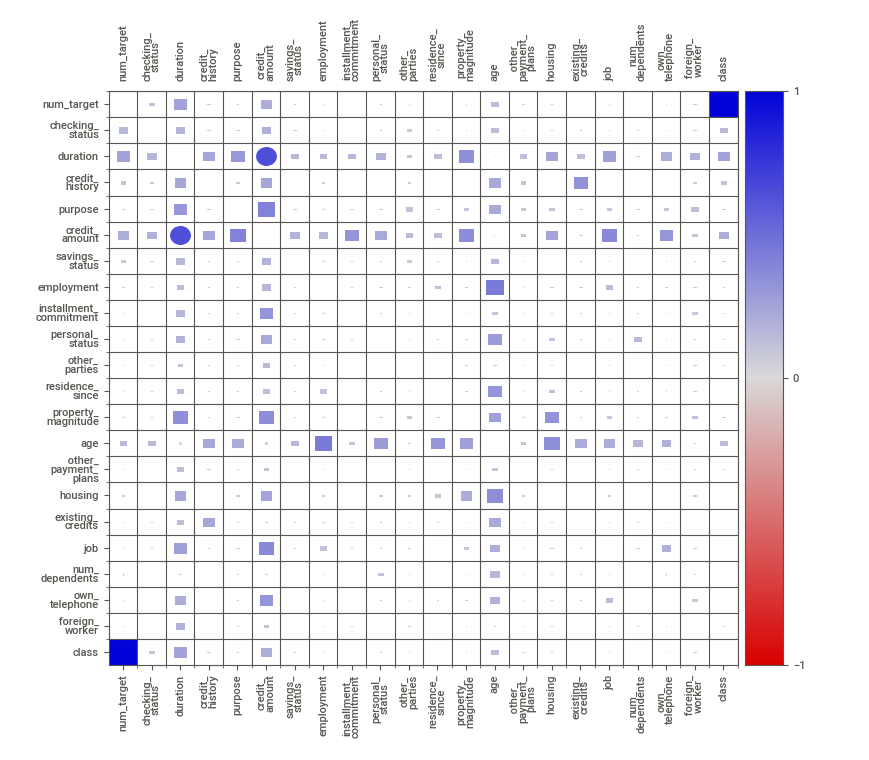
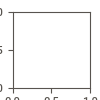

In [ ]:
target_analysis.show_notebook( layout='widescreen')

## Things to notice/consider

#### **Target class**
We see a 'good rate' of 70%, i.e. 70% percent of the applicants are classified as good and 30% as bad. This is not a real extreme unbalanced situation, and the balance in this data set is probably already 'artificial' generated by having added more bad loans in the this data set. In real loan portfolios from banks a 30% rate of bad loans would often mean 'end-of-business', you typically would see bad rates of 1 or 2 percent........  

#### **Checking status**  and **saving status**
A large portion of the applicants do not have a checking account. One might consider sub models for applicants having a checking account and for applicants who have no checking account. When a bank that provides the loan also has the applicant as a checking account customer, then additional interesting financial info can be derived that will influence the probability of loan repayment. And from the sweetviz visual we do see increasing 'good rates' when here is a higher checking balance.

Same could be said for saving status, the more saving you have the higher the 'good rate'. You need to be awre of potential biasses here. The more balances on savings or checking accounts, the less likely it is you need a loan in the first place.

#### **Duration**

Typically loans would have durations of 12, 24,36, etc months (whole years). We do see loans that 'deviate' from these 'whole years' durations. What kind of loans are they? Do they go trough different application process. When an applicant wants a loan of '16 months' is that taylored to a specific situtaion of the applicant? Overall pattern is that the shorter duration of the loan the higher the 'good rate' is


#### **Loan purpose**
A high good rate for 'used cars'. When the applicant gets into financial trouble, the value of used cars are reasable stable and he could sell the car to repay the loan. That may not be the case for other goods, as we see in the visual.

#### **Personal status**
This is a sensitive input variable. It isn't strongly correlated with the target, but you don't want to run the risk of discriminating based on gender. In building credit risk models it is forbidden to use this variable explicitly. And even so you could do a subpopulation analysis to see if your model is biased towards gender.

#### **Age**
There is a funy drop in good rate visible at around the age of 50 years. Could this be children related? At that age people who have children might face extra financial spend, school, uni etc? In terms of modeling, this is not a monotone relation, could be an issue in logistic regression for example.

### low cardinality categories
Be aware of input variables with low cardinality categories, but with potential high (or low) risk!  Two examples here are 'foreign_worker' and 'other_parties'. We see a small number of applicants which are classed as 'co applicant', they have a high bad rate. They might not come up in the model because of the low cardinality. But they could be included as a business rule.

### Missing data

Be prudent when there are missing values! Sometimes the data analists fill in the blanks of missing numerical data with the median or mean value. Or in case when the missing data is categorical, the blank is filled in with the most occuring category level. I think that is a bad thing to do.

1. Find out why the data is missing, and see if missing data can occur when applying the model.
2. Missing value can be a category on its own. I.e. Credit Purpose, missing we could set the category to unknown. 
3. In case of credit scoring, be prudent, don't give *the benefit of the doubt*. Prevent the loan applicant from 'hacking the system' by rather giving no income than a 'bad income'. Or he might not fill in a loan purpose when the money is used for a risky business.....


Often the final scoring system for loan applicants is not just only the predictive models but also a set of 'business rules'. In case of missing info at the loan application, the loan shouldn't pass automatically.

### Strategy when there are many variables

The German credit data set is a small data set, both in terms of number of variables and number of records. In real life banking loan data, one might have hundreds of potential input variables. In credit scoring, well in any predictive modeling, its very unlikely that you would need all of those hundreds of input variables in the final model.


A first shifting should be done. This can be done with fitting an initial model, say a random forest. Then for this model we could look at the top 20 or 30 impportant variables. If there is enough data, ideally this would be done on a seperate sample of the data, in that case you would not mix variable selecting with model training/testing and validation. Then proceed with the selected variables towards a final model and drop the rest of the variables.



# Predictive Models


In this secion we try different models and chose one model.

With Pycaret you need to setup an 'experiment' first.

For the German Credit data set, the data set is very small, so we do not have the luxury to split the data in many pieces. It is good practice to "learn something" from the data (i.e. what variables are important) on a separate part of the data. Thus, preventing 'leakage of information' when using the same data to train the model.

In any case, Pycarets default setup will split the data into two parts, train/holdout 70/30. On the train part Pycaret will use cross validation with ten folds to come up with estimates of the model performances like AUC, F1, Kappa, etc.

The holdout set is used to evaluate the final model.

In [4]:
### remove the nunmerical target that we created earlier for plotting purposes
german_credit = german_credit.drop(columns = ['num_target'])

In [ ]:
gc_models = setup(data = german_credit, target = 'class', session_id=123) 

In [6]:
### Get an overview of performances for different models.
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.7525  0.0000  0.8917  0.7897   
lr                    Logistic Regression    0.7482  0.7574  0.8777  0.7926   
rf               Random Forest Classifier    0.7468  0.7381  0.9258  0.7690   
lda          Linear Discriminant Analysis    0.7467  0.7570  0.8657  0.7975   
et                 Extra Trees Classifier    0.7411  0.7095  0.9018  0.7742   
gbc          Gradient Boosting Classifier    0.7383  0.7327  0.8838  0.7794   
ada                  Ada Boost Classifier    0.7382  0.7327  0.8638  0.7893   
lightgbm  Light Gradient Boosting Machine    0.7268  0.7239  0.8658  0.7785   
dummy                    Dummy Classifier    0.7139  0.5000  1.0000  0.7139   
nb                            Naive Bayes    0.7053  0.7223  0.7376  0.8312   
knn                K Neighbors Classifier    0.6638  0.5328  0.8556  0.7239   
dt               Decision Tree Classifier    0.6412  0.5734  0.7318  0.7581   
svm                   SVM - Linear Kernel    0.5524  0.0000  0.6060  0.5122   
qda       Quadratic Discriminant Analysis    0.3448  0.5081  0.1262  0.7565   

              F1   Kappa     MCC  TT (Sec)  
ridge     0.8372  0.3272  0.3407     0.018  
lr        0.8326  0.3284  0.3376     0.431  
rf        0.8396  0.2602  0.2828     0.516  
lda       0.8299  0.3366  0.3421     0.023  
et        0.8326  0.2729  0.2902     0.490  
gbc       0.8281  0.2876  0.2997     0.184  
ada       0.8247  0.3115  0.3176     0.130  
lightgbm  0.8191  0.2646  0.2723     0.096  
dummy     0.8331  0.0000  0.0000     0.015  
nb        0.7805  0.3354  0.3421     0.017  
knn       0.7840  0.0460  0.0479     0.120  
dt        0.7428  0.1426  0.1435     0.020  
svm       0.5408  0.0232  0.0097     0.019  
qda       0.2134  0.0094  0.0281     0.023

## Considerations

The table above shows different performances for different models. It is a first indication what tyoe of models are good/better or bad. The numbers will only partiallly help you in your final model choice.

Keep in mind that we have a very small data set here at hand, and as we see below the performance measures vary quit a lot from fold to fold. So do not blindly stare on a performance that is slightly better.

## Keep it simple (Ockhams Razor)

 different models Hier nog benomen ook noemen waarom LR / Tree or RF en andere bevindingen

why is lrm already so good?

There is little data, lrm is efficient

## strategies when lrm is less than tree and forests 

# Focus on logistic regression model

In [7]:
GC_lrm = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7714  0.8200  0.9200  0.7931  0.8519  0.3636  0.3836
1       0.7571  0.7070  0.9000  0.7895  0.8411  0.3352  0.3485
2       0.7857  0.7600  0.9200  0.8070  0.8598  0.4134  0.4298
3       0.7571  0.7460  0.9200  0.7797  0.8440  0.3121  0.3352
4       0.8143  0.8690  0.8800  0.8627  0.8713  0.5381  0.5384
5       0.7286  0.7490  0.8400  0.7925  0.8155  0.3037  0.3055
6       0.6714  0.7020  0.8200  0.7455  0.7810  0.1297  0.1321
7       0.7286  0.7500  0.8400  0.7925  0.8155  0.3037  0.3055
8       0.7571  0.7110  0.8800  0.8000  0.8381  0.3568  0.3633
9       0.7101  0.7602  0.8571  0.7636  0.8077  0.2273  0.2337
Mean    0.7482  0.7574  0.8777  0.7926  0.8326  0.3284  0.3376
SD      0.0383  0.0494  0.0353  0.0290  0.0259  0.1022  0.1033

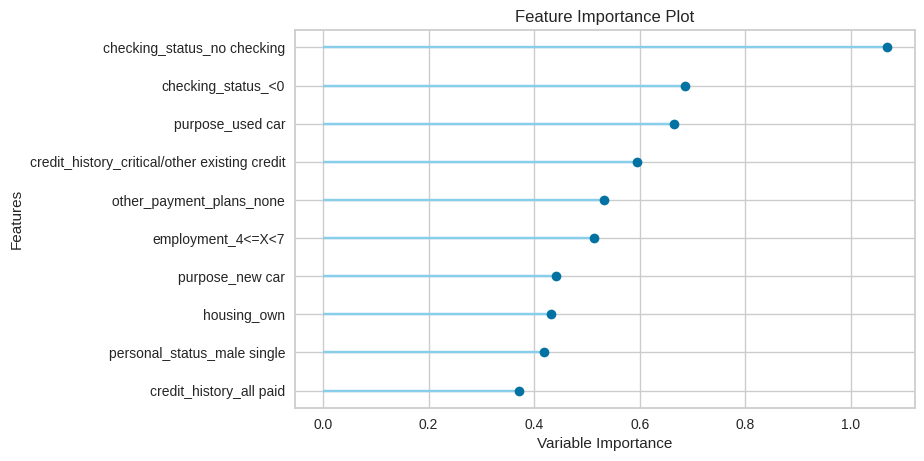

In [ ]:
plot_model(GC_lrm, plot = 'feature')

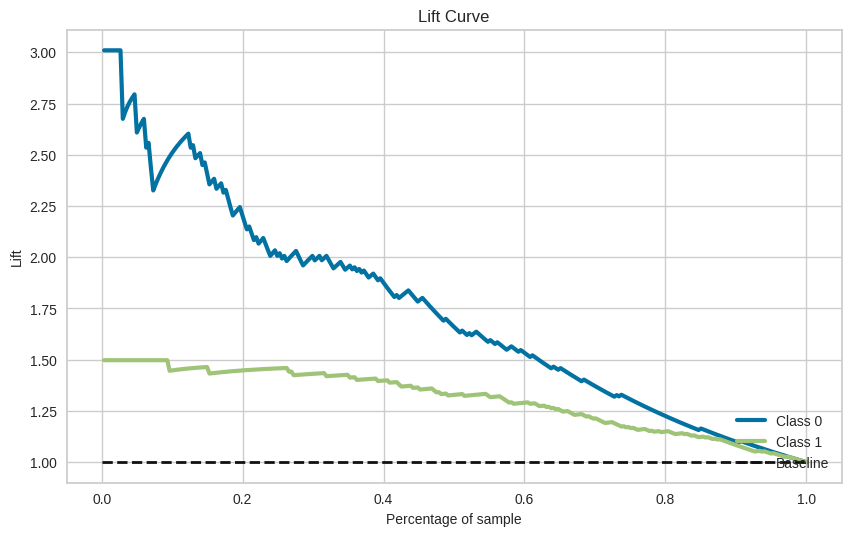

In [ ]:
plot_model(GC_lrm, plot = 'lift')

Mention the importance of lift curves

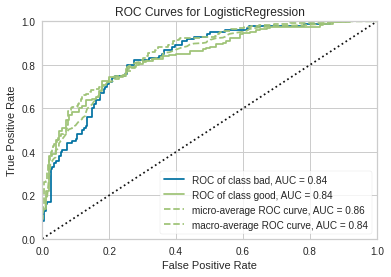

In [ ]:
plot_model(GC_lrm, plot = 'auc')

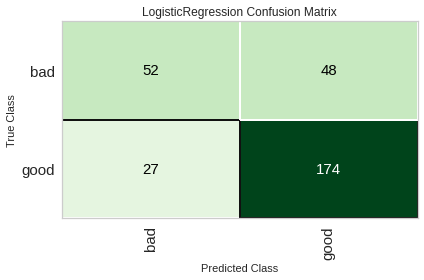

In [ ]:
plot_model(GC_lrm, plot='confusion_matrix')

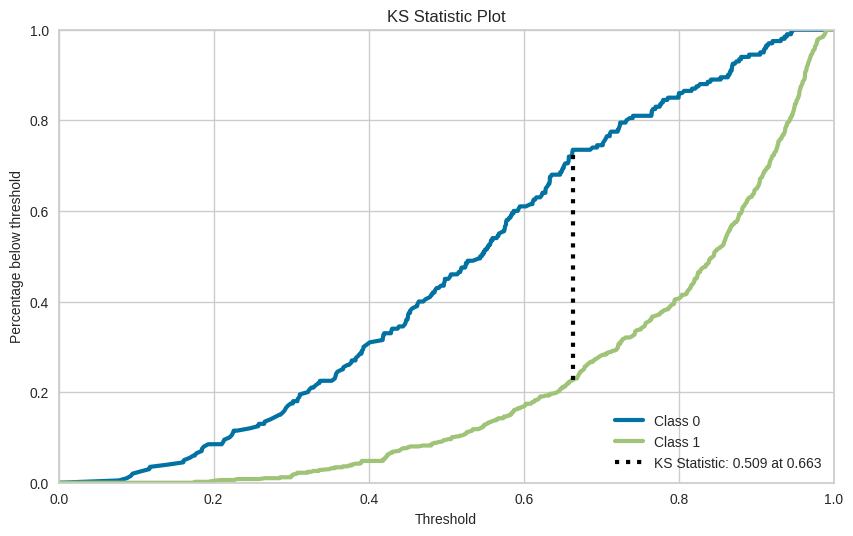

In [ ]:
plot_model(GC_lrm, plot = 'ks')

## Model explainability

In [ ]:
Comes automatically with logistic regression ---> score card a little side tour with statmodels



In [ ]:
import statsmodels.formula.api as smf
import patsy

In [ ]:
german_credit['num_target'] =  np.where(german_credit['class'] == 'good', 1, 0)

In [ ]:
y, X = patsy.dmatrices("num_target ~ duration + checking_status + credit_history + purpose",
                        data=german_credit,
                        return_type="dataframe")

In [ ]:
GC_lrm_SM = smf.logit('num_target ~ duration +  + checking_status  + purpose', data = german_credit).fit()

Optimization terminated successfully.
         Current function value: 0.510167
         Iterations 6


In [ ]:
GC_lrm_SM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             num_target   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      986
Method:                           MLE   Df Model:                           13
Date:                Sun, 13 Feb 2022   Pseudo R-squ.:                  0.1648
Time:                        16:41:32   Log-Likelihood:                -510.17
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 7.066e-36
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.3867      0.313      4.433      0.000       0.774       2.000
checking_status[T.<0]             -0.4845      0.187     -2.590      0.010      -0.851      -0.118
checking_status[T.>=200]           0.6373      0.338      1.884      0.060      -0.026       1.300
checking_status[T.no checking]     1.4942      0.210      7.121      0.000       1.083       1.906
purpose[T.domestic appliance]     -0.1233      0.734     -0.168      0.867      -1.563       1.316
purpose[T.education]              -0.7084      0.407     -1.741      0.082      -1.506       0.089
purpose[T.furniture/equipment]     0.0417      0.303      0.138      0.890      -0.551       0.635
purpose[T.new car]                -0.3865      0.288     -1.343      0.179      -0.950       0.177
purpose[T.other]                   0.4347      0.666      0.653      0.514      -0.871       1.740
purpose[T.radio/tv]                0.3359      0.287      1.170      0.242      -0.227       0.899
purpose[T.repairs]                -0.3399      0.539     -0.631      0.528      -1.396       0.716
purpose[T.retraining]              0.8958      1.120      0.800      0.424      -1.299       3.091
purpose[T.used car]                1.0160      0.374      2.716      0.007       0.283       1.749
duration                          -0.0427      0.007     -6.513      0.000      -0.056      -0.030
==================================================================================================
"""

## AI Fairness

In case we had used a random forest, it was much harder to interpret the model and check for fairness.

We could use shap values to see the effecct of individual divers on the prediction, and moreover we should use sub population analysis to see if the model is biased in favor of a sub population.


